# Social Computing/Social Gaming - Summer 2022
# Exercise Sheet 1 - Introduction to Python
Welcome to the 2022 Social Computing / Social Gaming tutorial assignments. For all exercise sheets Python is the programming language of choice. This exercise sheet will therefor provide an introduction to Python for you. In the latter part of this exercise sheet you will take on your first Social Computing task.

In addition to the exercise sheet iPython notebooks it is essential for you to have a look at the introduction videos and/or the introduction slides, both provided on Moodle, for every exercise sheet as they contain **helpful hints** and the **form of the assignment** which is **mandatory**!

## Task 1.1: Largest palindrome product
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99

Find the largest palindrome made from the product of two 3-digit numbers.

**a)** Create the function findPalindrome(N), which returns 1 if N is a Palindrome or 0 if it isn't.

**Hints:**

- In order to execute a code cell, press Shift + Enter.

In [1]:
# DONE:
def findPalindrome(N):
    reading_left = str(N)
    reading_right = str(N)[::-1]

    if reading_left == reading_right:
        return 1
    else:
        return 0

**b)** Now create the function maxPalindrome(), which computes the largest palindrome made from the product of two 3-digit numbers

In [2]:
# DONE:
def maxPalindrome(n, j):
    product = n * j

    while True:
        if findPalindrome(product) == 1:
            return product
        else:
            product = product - 1

print(maxPalindrome(999,999))

997799


For this task problem 4 of [ProjectEuler.net](https://projecteuler.net/about) [1] was used, if you have fun solving this kind of mathematical riddles please check them out.

## Task 1.2 : The Simpsons are introducing Social Computing
In social computing research, we need powerful tools to create, manipulate and display graphs. Luckily, there is a plethora of tools and libaries for that. 
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Especially for the second exercise sheet, we are going to use [**NetworkX**](https://networkx.github.io) [2]. It provides rich graph data structures and many out-of-the-box functions to process graphs and calculate different metrics. The tasks below should make you familiar with the library.<br>
Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) [3] and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html) [4].

To give you a short background on graph visualization, it is the research area in mathematics/computer science concerned with drawing graphs. It has applications in many fields, one of them is social computing. The quality of graph visualization is measured based on certain criteria, for example crossing minimization and bend minimization. There are many graph drawing algorithms that vary in their quality according to the graph's application and size. One technique is to draw graphs by using physical analogies.<br>
The basic idea of this technique is to associate edges between graph nodes with physical forces acting upon the nodes and computing an energy minimum. By setting off the dynamics that is induced by the forces, the graph will finally settle into a natural optimal display. A famous algorithm that implements this technique is the **Fruchtermann-Rheingold** algorithm. Its basic idea is to replace the graph edges with mechanical springs, and let the springs move the system to a minimal energy state.


Furthermore, you will be working with a large datasets, you need to save the variables in a suitable data format. In our case, the pandas library is a good choice. 
A pandas DataFrame is a 2D tabular structure, not unlike a SQL table.
Pandas DataFrame consists of rows, columns and data.
For more information on the library, see the [pandas manual](https://pandas.pydata.org/pandas-docs/version/0.19.2) [5] and its [tutorial](https://pandas.pydata.org/pandas-docs/version/0.19.2/10min.html) [6] to pandas dataframes.

In this exercise you will analyze a dataset about the TV show "The Simpsons".

First import the datasets consisting ``nodes.csv``, ``edges.csv`` and ``ep-char.csv``.

- **nodes.csv**: each vertex represents a character
- **edges.csv**: edges between the source character and target character. Represents an undirected graph showing the characters which appeared together in an episode
- **ep-char.csv**: shows which character has appeared in which episode


**HINT**: 
- For most TODOs it is sufficient to look at the pandas manual and use pandas library functions  
- You can get a better overview of the dataframe by printing it

**Import** the necessary libraries for this exercise.

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

**Read** the csv files into pandas dataframes.

In [4]:
# Read the csv into pandas DataFrames
df_edges = pd.read_csv("simpsons/edges.csv")
df_nodes = pd.read_csv("simpsons/nodes.csv")
df_epchar = pd.read_csv("simpsons/ep-char.csv")

# 226 is the number of the last episode in season 10.
HIGHEST_EPISODE = 226

**a)** Your first task is to **drop unwanted rows** in the episodes dataframe. We are only interested in Seasons 1-10.   

**Hint:** Unwanted rows are rows which have an ``episode_id`` higher than ``HIGHEST_EPISODE``.   
**Note:** Please note that this operation will only delete the rows without changing the weights of the characters. Do not worry about this.

In [5]:
# DONE: drop rows of the df_epchar DataFrame.
indexNames = df_epchar[(df_epchar['episode_id'] > HIGHEST_EPISODE)].index

# Delete these row indices from the dataframe
df_epchar.drop(indexNames, inplace=True)

**b)** Now you can **merge** the DataFrames together to link the required information. This is not unlike the join operation in SQL.

Since we are only interested in characters from the first 10 seasons, create a DataFrame ``df_merged`` which only contains characters from the first 226 episodes.

In [6]:
# DONE:
df_merged = df_epchar.merge(df_nodes, left_on = 'character_id', right_on = 'Id')


# df_merged now consists of the characters which appear only in the first 10 seasons
df_merged.drop(['episode_id', 'character_id'], axis=1, inplace=True)

# DONE: now we have unnecessary information, drop the duplicates.

df_merged.drop_duplicates(subset = ['charname'], inplace = True)

**c)** Now use the DataFrame of limited characters and **merge** them with the edges

In [7]:
# TODO:
# Hint: Use a left join, left_on='Id', right_on='Source'
df_merged2 = pd.merge(df_merged, df_edges, how = 'left', left_on = 'Id', right_on =  'Source')


# Drop Type, as it is not that interesting
df_merged2 = df_merged2.drop(['Type'], axis=1)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
4,1,'Homer Simpson',1,6,2
...,...,...,...,...,...
10070,252,'Wink',252,2,1
10071,252,'Wink',252,3,1
10072,252,'Wink',252,4,1
10073,252,'Wink',252,36,1


**d)** Now we are only interested in **characters who have appeared at least 20 times together. Select those.**

In [8]:
# TODO: drop rows of the df_episodes DataFrame.
indexNames = df_merged2[(df_merged2['Weight'] < 20)].index

# Delete these row indices from the dataframe
df_merged2.drop(indexNames, inplace=True)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
6,1,'Homer Simpson',1,8,29
...,...,...,...,...,...
8329,138,'Ralph Wiggum',138,4,31
8480,58,'Superintendent Gary Chalmers',58,1,20
8482,58,'Superintendent Gary Chalmers',58,3,22
8483,58,'Superintendent Gary Chalmers',58,4,22


**e)** Now you have to **include your alter ego into the network**. Create a pandas Series with your name, your Id (which is 1337) and weights. Connect yourself to Bart Simpson. 

In [9]:
# DONE:
# Create a series for your character who is connected to homer 234 times and add it to the dataframe
alter_ego = pd.DataFrame({'charname':['Raphael Tuksa'], 'Id': [1337], 'Source': [1337], 'Target': [3], 'Weight': [234]})
bart_ego = pd.DataFrame({'charname':['Bart Simpson'], 'Id': [3], 'Source': [3], 'Target': [1337], 'Weight': [234]})
# DONE: 
# Append the newly created series to the pandas data frame
df_merged2 = pd.concat([df_merged2, alter_ego], ignore_index = True)
df_merged2 = pd.concat([df_merged2, bart_ego], ignore_index = True)

# Create the graph from the dataframe
graph = nx.from_pandas_edgelist(df_merged2, source="Id", target="Target", edge_attr=True)

**f)** **Draw** the resulting graph with the given options. Choose 2 [layout](https://networkx.github.io/documentation/stable/reference/drawing.html) [7] options that seem the most suitable for the data. Briefly discuss why you chose these over the others.

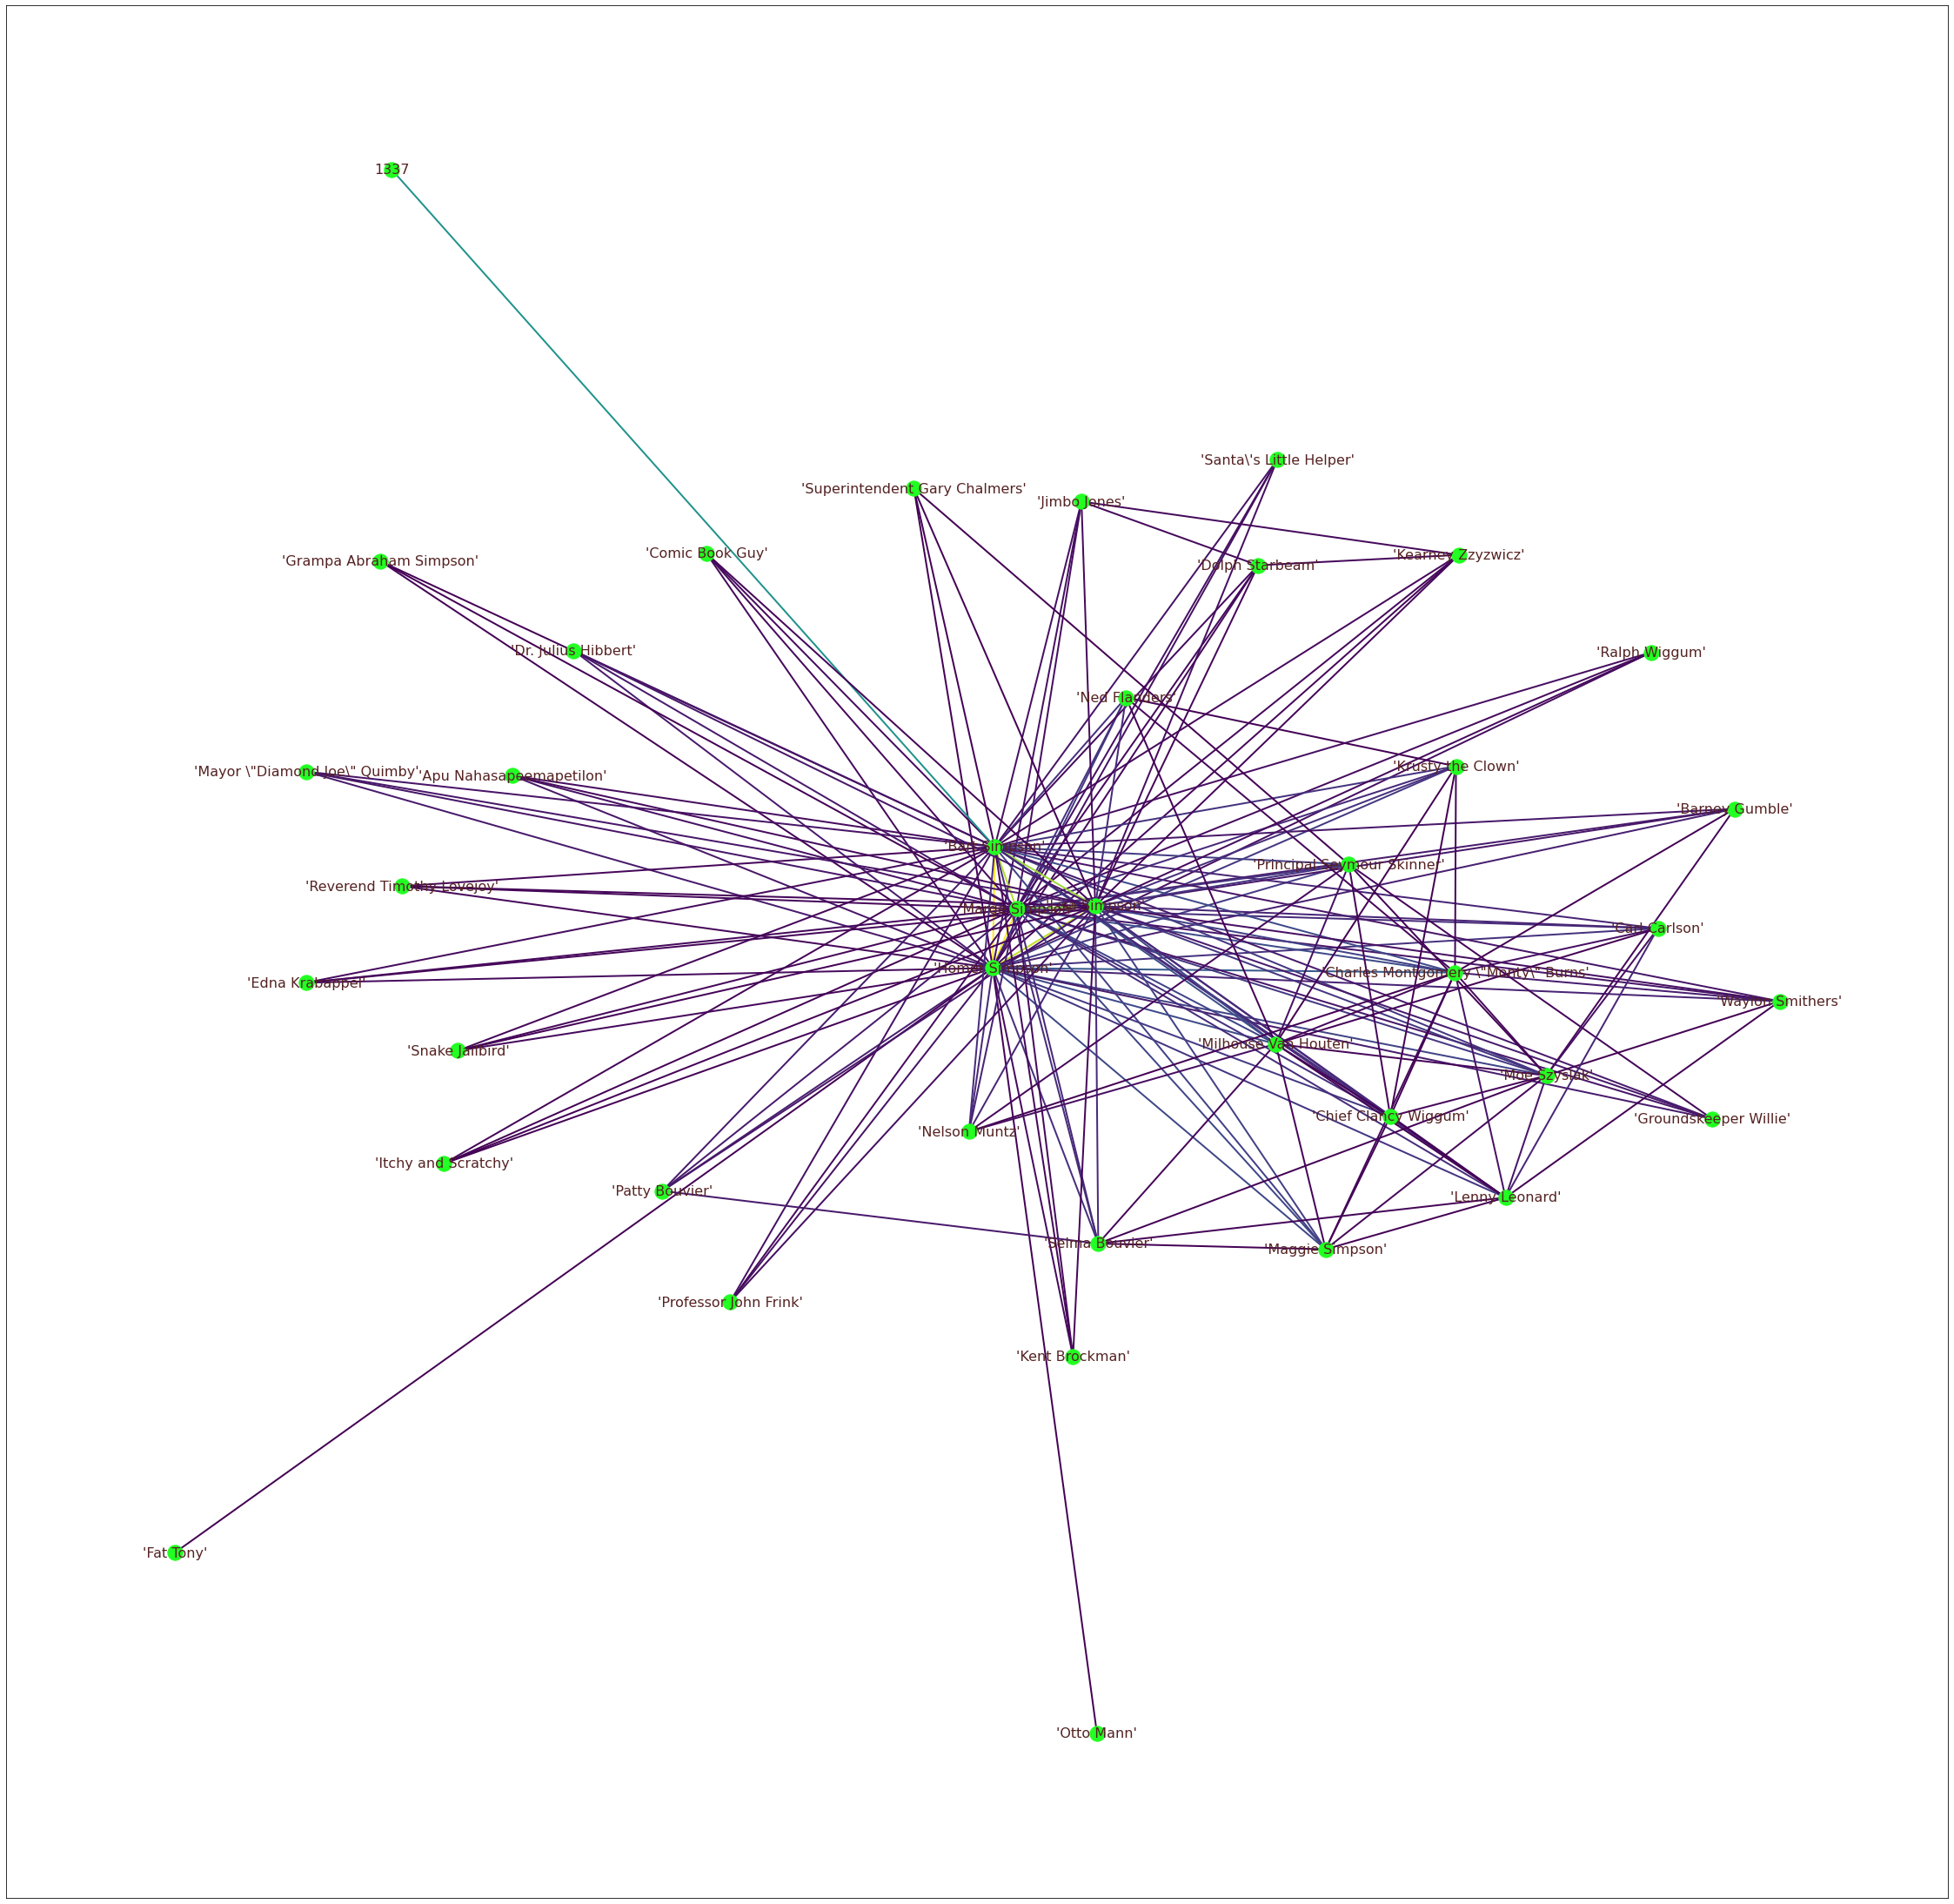

In [10]:
# Relabel the graph
df_nodes_labels_dict = df_nodes.set_index('Id').to_dict()['charname']
graph = nx.relabel_nodes(graph, df_nodes_labels_dict)

# Set the edge color according to the weight
edges,weights = zip(*nx.get_edge_attributes(graph,'Weight').items())

# Style the graph
options = {
    "font_size" : 16, #Was 14
    "font_color" : '#552222',
    "node_color" : '#22FF22',
    "width" : 2.0, #Was 5.0
    "edgelist" : edges,
    "edge_color" : weights,
    "edge_cmap" : plt.cm.Blues #Makes the graph less readable
}

plt.figure(1,figsize=(40,40)) 

# DONE: plot the graph
nx.draw_networkx(graph, font_size = options["font_size"], font_color = options["font_color"], node_color = options["node_color"], width = options["width"], edgelist = options["edgelist"], edge_color = options["edge_color"])
#nx.draw_kamada_kawai(graph)

**TODO: Write your observations here:**
For the first graph I decided to choose an networkx graph. With this type of graph, we can clearly see the main characters, the ones that a larger amount of connections, situated in the middle of the graph. The outer characters have less connections, meaning that they probably appear less in the TV-Show and also appear in less connections to other not main characters. For the options of the graph I decided to icrease the font size, decrease the width and not use edge_cmap to have a more clear and readable graph.For the second graph I decided to show a simpler graph, the kamada kawai graph just to show more clearly the characters layers. In the middle the four main characters. Above there is the secondary characters that have less overall connections than the main ones, but stil have connections with other side characters. Lastly the characters that appear only a few amount of times are the ones only connected to the main characters.

## References

[1] https://projecteuler.net/about
<br>[2] https://networkx.github.io
<br>[3] https://networkx.github.io/documentation/stable/reference/index.html
<br>[4] https://networkx.github.io/documentation/stable/tutorial.html
<br>[5] https://pandas.pydata.org/pandas-docs/version/0.19.2
<br>[6] https://pandas.pydata.org/pandas-docs/version/0.19.2/10min.html
<br>[7] https://networkx.github.io/documentation/stable/reference/drawing.html